In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split
import pickle as pkl

In [5]:
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

# analyze lasso results

In [12]:
# results from bigstatsR 
covar_only = pd.read_csv("data/covar_only_result_cv_1e6.txt", header=None)
meth_only = pd.read_csv("data/meth_only_result_cv_1e6.txt", header=None)
meth_covar = pd.read_csv("data/meth_covar_result_cv_1e6.txt", header=None)

In [13]:
# actual case/control labels
true = pd.read_csv("data/als_lasso_status.txt", delimiter="\t", header=None)

## confusion matrices 

In [14]:
### confusion matrix for one model type at a time 
cnf = confusion_matrix(true, np.round(meth_only[0]))

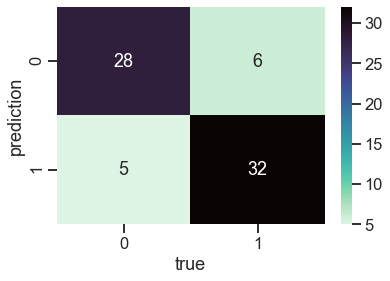

In [32]:
sns.heatmap(cnf, annot=True, cmap="mako_r")
plt.xlabel("true")
plt.ylabel("prediction")
plt.show()

## classification report

In [33]:
# also for one model type at a time 
print(classification_report(true, np.round(meth_covar[0])))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        34
           1       0.86      0.84      0.85        37

    accuracy                           0.85        71
   macro avg       0.84      0.85      0.84        71
weighted avg       0.85      0.85      0.85        71



## auROC 

In [34]:
# use sklearn tool to calculate roc 
meth_auc = np.round(roc_auc_score(true[0], meth_only[0]), 2)
meth_covar_auc = np.round(roc_auc_score(true[0], meth_covar[0]), 2)
covar_auc = np.round(roc_auc_score(true[0], covar_only[0]), 2)

In [36]:
covar_auc, meth_auc, meth_covar_auc  # print aucs

(0.76, 0.92, 0.93)

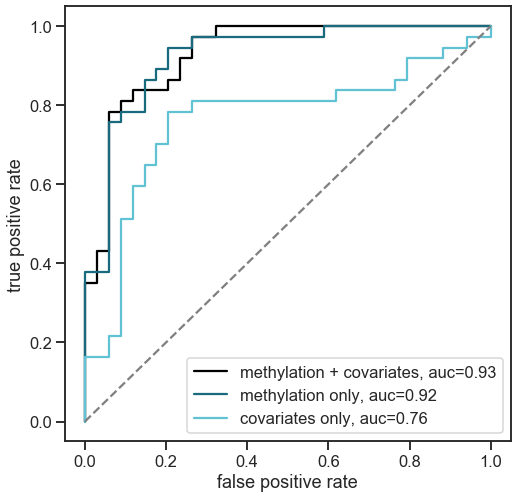

In [37]:
# use matplotlib to plot auc for each model type 

plt.figure(figsize=(8, 8))
fpr_mc, tpr_mc, __ = roc_curve(true[0],  meth_covar[0],  pos_label=1)
fpr_m, tpr_m, __ = roc_curve(true[0], meth_only[0])
fpr_c, tpr_c, __ = roc_curve(true[0],  covar_only[0])


plt.plot(fpr_mc, tpr_mc,  color="black", label=f"methylation + covariates, auc={meth_covar_auc}")
plt.plot(fpr_m, tpr_m, color="#196a7d", label=f"methylation only, auc={meth_auc}")
plt.plot(fpr_c, tpr_c, color="#61c2d3", label=f"covariates only, auc={covar_auc}")
plt.plot([i/10 for i in range(11)], [i/10 for i in range(11)], color="grey", linestyle='--')

plt.legend()

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

plt.show()


# auPRC 

In [27]:
meth_ps = np.round(average_precision_score(true[0], meth_only), 2)
meth_covar_ps = np.round(average_precision_score(true[0], meth_covar), 2)
covar_ps = np.round(average_precision_score(true[0], covar_only), 2)

In [28]:
meth_ps, covar_ps, meth_covar_ps

(0.92, 0.79, 0.93)

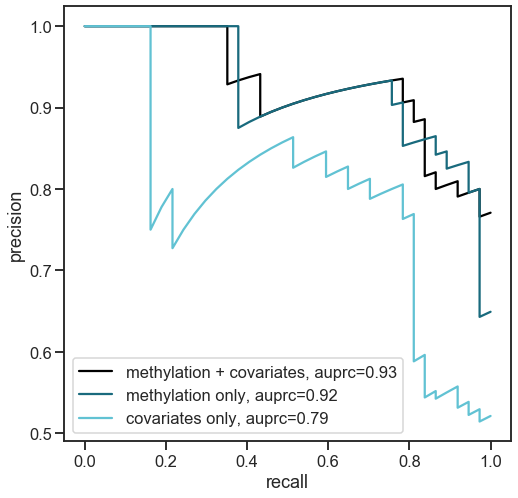

In [30]:
plt.figure(figsize=(8, 8))

precision_mc, recall_mc, _ = precision_recall_curve(true[0],  meth_covar[0], pos_label=1)
precision_m, recall_m, __ = precision_recall_curve(true[0],  meth_only[0], pos_label=1)
precision_c, recall_c, __ = precision_recall_curve(true[0], covar_only[0], pos_label=1)


plt.plot(recall_mc, precision_mc,  color="black", label=f"methylation + covariates, auprc={meth_covar_ps}")
plt.plot(recall_m, precision_m,  color="#196a7d", label=f"methylation only, auprc={meth_ps}")
plt.plot(recall_c, precision_c, color="#61c2d3", label=f"covariates only, auprc={covar_ps}")

plt.legend() 
plt.xlabel("recall")
plt.ylabel("precision")

plt.show()
